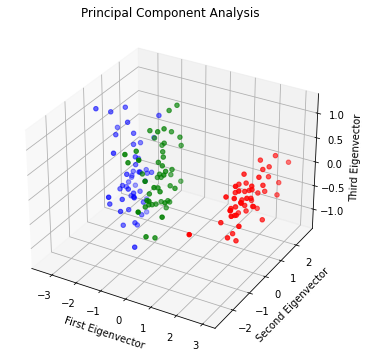

Eigenvalues:
Eigenvalue 1: 3.7603354028241256
Eigenvalue 2: 0.9279491722113403
Eigenvalue 3: 0.23570257150212173
Eigenvalue 4: 0.08883057252968948
Eigenvalue 5: 0.020739327912588142


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def pca(dataset):
    # Remove the Species column and store it separately
    species = dataset['Species']
    dataset = dataset.drop('Species', axis=1)
    
    # Convert the dataset to a NumPy array
    data = dataset.values
    
    # Standardize the data
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    standardized_data = (data - mean) / std
    
    # Compute the covariance matrix
    covariance_matrix = np.cov(standardized_data.T)
    
    # Compute the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    
    # Sort eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    # Select the top three eigenvectors
    top_eigenvectors = eigenvectors[:, :3]
    
    # Project the data onto the top eigenvectors
    projected_data = np.dot(standardized_data, top_eigenvectors)
    
    # Plotting the data on the first three eigenvectors
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    # Assign colors based on species
    species_mapping = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}
    species_colors = [species_mapping[s] for s in species]
    
    ax.scatter(projected_data[:, 0], projected_data[:, 1], projected_data[:, 2], c=species_colors)
    ax.set_xlabel('First Eigenvector')
    ax.set_ylabel('Second Eigenvector')
    ax.set_zlabel('Third Eigenvector')
    ax.set_title('Principal Component Analysis')
    
    plt.show()
    
    # Print the eigenvalues
    print("Eigenvalues:")
    for i, eigenvalue in enumerate(eigenvalues):
        print(f"Eigenvalue {i+1}: {eigenvalue}")

# Load the Iris dataset
iris_df = pd.read_csv('Iris Dataset.csv')

# Apply PCA
pca(iris_df)
